As we know , Each sporting occasion yields copious amounts of data, offering valuable insights into player and team performance as well as key moments of the game. So , in the following notebook we have tried ti analyze T-20 men's world cup data and tried to get meaningful insights out of it.

The dataset was provided to us in the problem statement.
IThe dataset provided to us was very big and had 10000 rows , so i have summarised the data into summary.csv to make analysis easier.

In [36]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
data = pd.read_csv("T20 World cup 2022.csv")
data = pd.read_csv("summary.csv")
print(data.head())

   season       id                    name   short_name  \
0  2022.0  1298179      England v Pakistan    ENG v PAK   
1  2022.0  1298178         England v India  ENG v INDIA   
2  2022.0  1298177  New Zealand v Pakistan     NZ v PAK   
3  2022.0  1298176        India v Zimbabwe  INDIA v ZIM   
4  2022.0  1298175   Bangladesh v Pakistan    BAN v PAK   

                                         description home_team away_team  \
0  Final (N), ICC Men's T20 World Cup at Melbourn...       ENG       PAK   
1  2nd Semi-Final (N), ICC Men's T20 World Cup at...       ENG     INDIA   
2  1st Semi-Final (N), ICC Men's T20 World Cup at...        NZ       PAK   
3  42nd Match, Group 2 (N), ICC Men's T20 World C...     INDIA       ZIM   
4  41st Match, Group 2, ICC Men's T20 World Cup a...       BAN       PAK   

      toss_won    decision 1st_inning_score  ...  \
0      England  BOWL FIRST            137/8  ...   
1      England  BOWL FIRST            168/6  ...   
2  New Zealand   BAT FIRST      

Checking Missing values

In [3]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
season              3
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
toss_won            3
decision            3
1st_inning_score    3
2nd_inning_score    3
home_score          3
away_score          3
winner              0
won by              5
start_date          0
end_date            0
venue_id            0
venue_name          0
home_captain        3
away_captain        3
pom                 4
points              6
super_over          3
home_overs          3
home_runs           3
home_wickets        3
home_boundaries     3
away_overs          3
away_runs           3
away_wickets        3
away_boundaries     3
highlights          4
home_key_batsman    3
home_key_bowler     3
home_playx1         3
away_playx1         3
away_key_batsman    3
away_key_bowler     3
match_days          3
umpire1             3
umpire2             3
tv_umpire           3
referee             3
reserve_umpire  

It shows 3 missing values because 3 matches were abondend.

As we know , ICC 2022 t-20 world cup had to stop 3 matches due to rain. This is being reflected here.

In [4]:
data_cleaned = data.dropna()


Descriptive Statistics:

In [9]:
numerical_stats = data.describe()

# Descriptive statistics for categorical columns
categorical_stats = data.describe(include=['object'])

# Frequency count for categorical variables
first_inning_score = data['1st_inning_score']
second_inning_score = data['2nd_inning_score']
home_score = data['home_score']
away_score = data['away_score']
home_overs = data['home_overs']
home_runs = data['home_runs']
home_wickets = data['home_wickets']
home_boundaries = data['home_boundaries']
away_overs = data['away_overs']
away_runs = data['away_runs']
away_wickets = data['away_wickets']
away_boundaries = data['away_boundaries']

# Print the frequency count for each column
print("Frequency Count for Categorical Variables:")
print(first_inning_score.value_counts())
print(second_inning_score.value_counts())
print(home_score.value_counts())
print(away_score.value_counts())
print(home_overs.value_counts())
print(home_runs.value_counts())
print(home_wickets.value_counts())
print(home_boundaries.value_counts())
print(away_overs.value_counts())
print(away_runs.value_counts())
print(away_wickets.value_counts())
print(away_boundaries.value_counts())

# Print the results
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)

print("\nFrequency Count for Categorical Variables:")
print(categorical_freq)

Frequency Count for Categorical Variables:
1st_inning_score
144/8    2
137/8    1
146/5    1
157/6    1
79/5     1
159/8    1
128/8    1
112      1
200/3    1
132/6    1
148/3    1
205/5    1
162/6    1
153/7    1
176/5    1
152/8    1
121/6    1
174/7    1
160/5    1
111/8    1
157      1
179/2    1
168/6    1
185/9    1
152/4    1
186/5    1
127/8    1
158/4    1
141/8    1
168/8    1
185/6    1
184/6    1
130/8    1
117      1
179/6    1
179/5    1
133/9    1
91/9     1
150/7    1
167/7    1
163/7    1
Name: count, dtype: int64
2nd_inning_score
138/5    1
150/1    1
158/3    1
51/0     1
135      1
160/6    1
133/1    1
113/5    1
111      1
133/5    1
141/8    1
170/0    1
146/9    1
122      1
180/4    1
73       1
122/5    1
143/9    1
118      1
112/7    1
105/5    1
101      1
123/9    1
129/8    1
153/3    1
115      1
128/5    1
145/8    1
144/6    1
164/7    1
150/9    1
108/9    1
145/6    1
120/5    1
159/6    1
148/4    1
137      1
137/5    1
95/4     1
147/8    1
102   

Now , we are going to Visualize the data with the help of some visulizations

Match outcomes Vs Toss

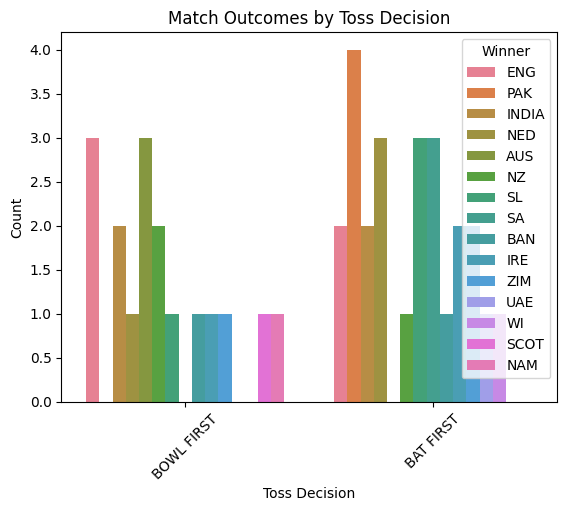

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize match outcomes based on toss decisions
sns.countplot(x='decision', hue='winner', data=data)
plt.title('Match Outcomes by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Winner')
plt.show()




Performance of individual teams

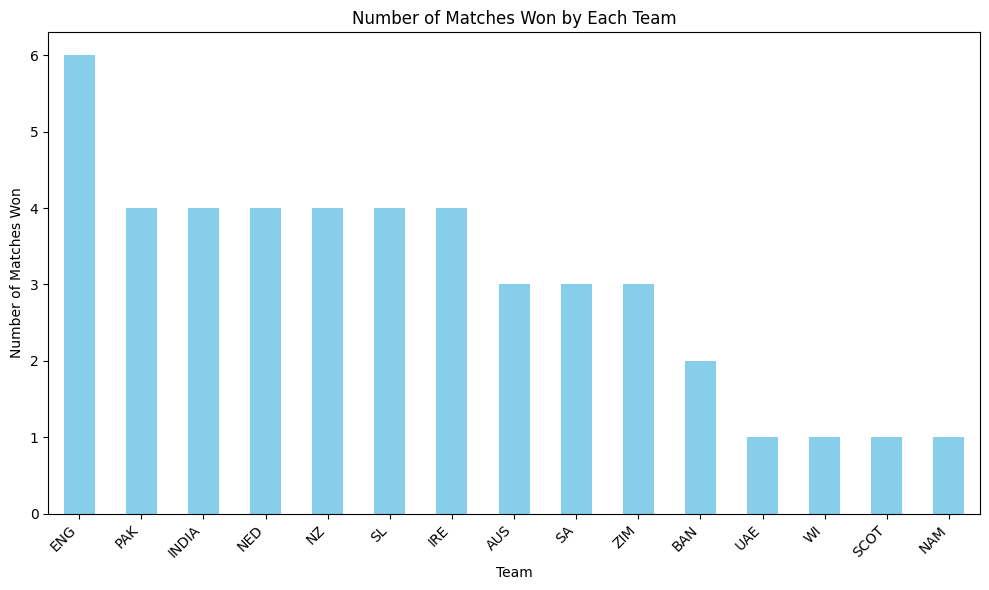

In [15]:

# Calculate the number of matches won by each team
matches_won = data['winner'].value_counts()

# Display the results
plt.figure(figsize=(10, 6))
matches_won.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Matches won by Runs Vs wickets

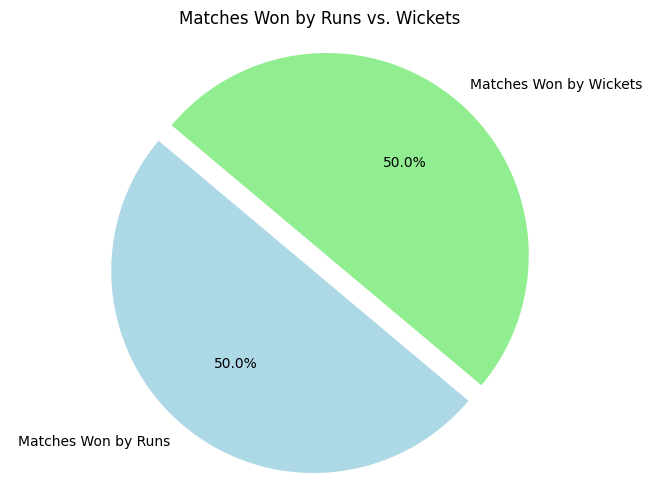

In [17]:
matches_won_by_runs = data[data['won by'].str.contains('runs', case=False, na=False)].shape[0]
matches_won_by_wickets = data[data['won by'].str.contains('wickets', case=False, na=False)].shape[0]

labels = ['Matches Won by Runs', 'Matches Won by Wickets']
sizes = [matches_won_by_runs, matches_won_by_wickets]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Matches Won by Runs vs. Wickets')
plt.axis('equal')
plt.show()

Choice after winning a Toss

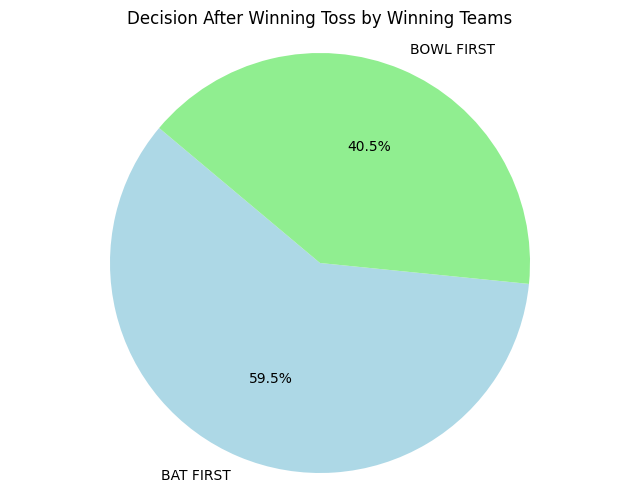

In [22]:

decision_counts = data['decision'].value_counts()

    decision_counts.empty:
    # Create a pie chart
    labels = decision_counts.index
    sizes = decision_counts.values
    colors = ['lightblue', 'lightgreen']

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Decision After Winning Toss by Winning Teams')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

Player of the match Data

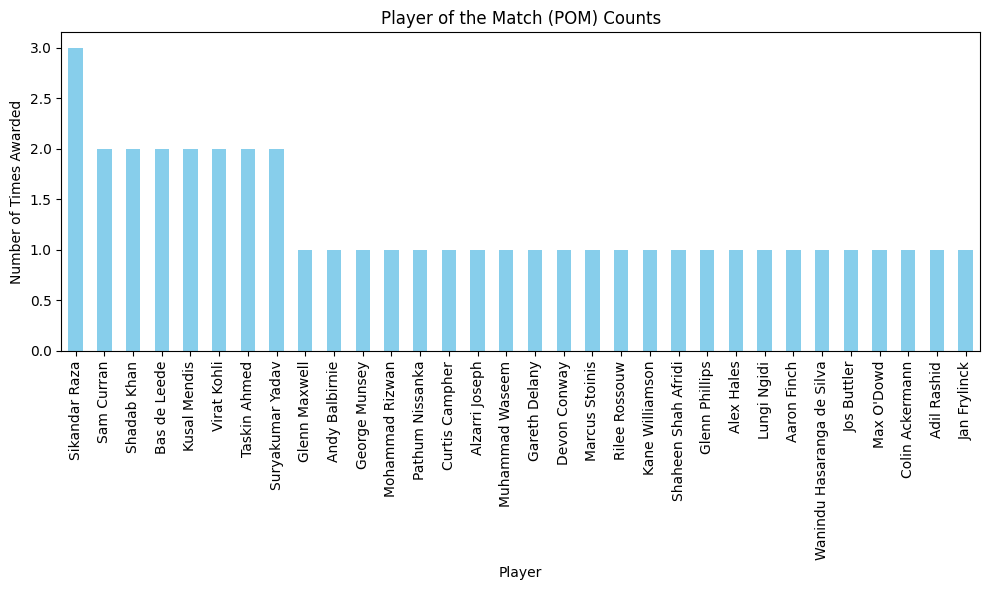

In [26]:
pom_counts = data['pom'].value_counts()
plt.figure(figsize=(10, 6))
pom_counts.plot(kind='bar', color='skyblue')
plt.title('Player of the Match (POM) Counts')
plt.xlabel('Player')
plt.ylabel('Number of Times Awarded')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This shows Sikander Raza was awarded the Player of the match maximum number of times

Top Scorer Data:

Top Scorers:
top scorer
Virat Kohli         5
Colin Ackermann     4
Suryakumar Yadav    3
Mohammad Rizwan     3
Najmul Hossain      3
Devon Conway        2
Ibrahim Zadran      2
Alex Hales          2
Pathum Nissanka     2
Ben Stokes          2
Name: count, dtype: int64


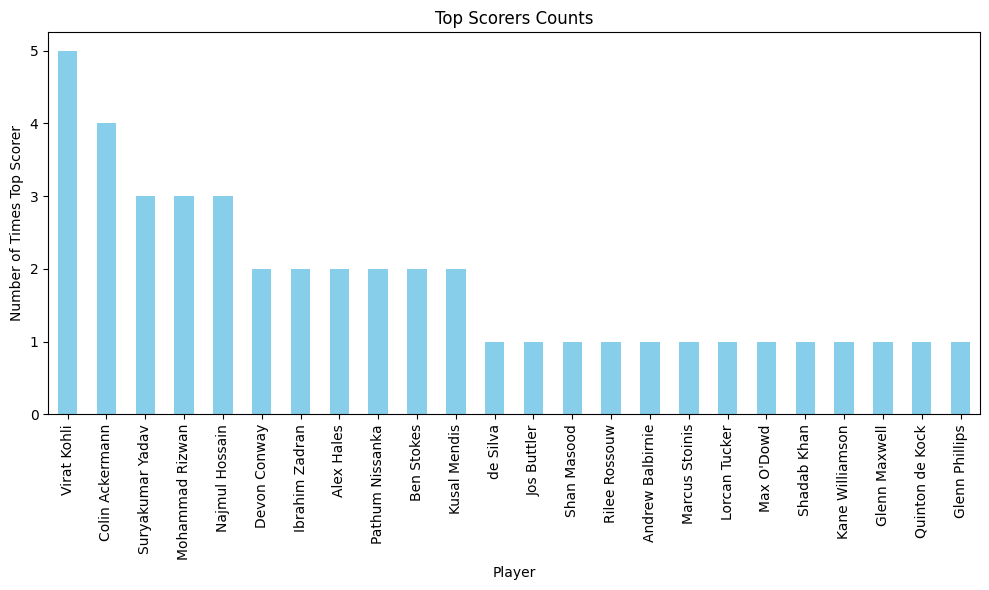

In [33]:
top_scorer_counts = data['top scorer'].value_counts()

# Display the top 10 scorers (optional)
print("Top Scorers:")
print(top_scorer_counts.head(10))

# Create a bar graph
plt.figure(figsize=(10, 6))
top_scorer_counts.plot(kind='bar', color='skyblue')
plt.title('Top Scorers Counts')
plt.xlabel('Player')
plt.ylabel('Number of Times Top Scorer')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

Thus Virat Kohli was the top scorer in most of the Matches.

Best Bowler:

Top Best Bowlers:
best bowler
Sam Curran             5
Shaheen Afridi         4
Tim Southee            2
Ravichandran Ashwin    2
Brandon Glover         2
Mark Wood              2
Naveen-ul-Haq          2
Lockie Ferguson        2
Chris Jordan           2
Anrich Nortje          2
Name: count, dtype: int64


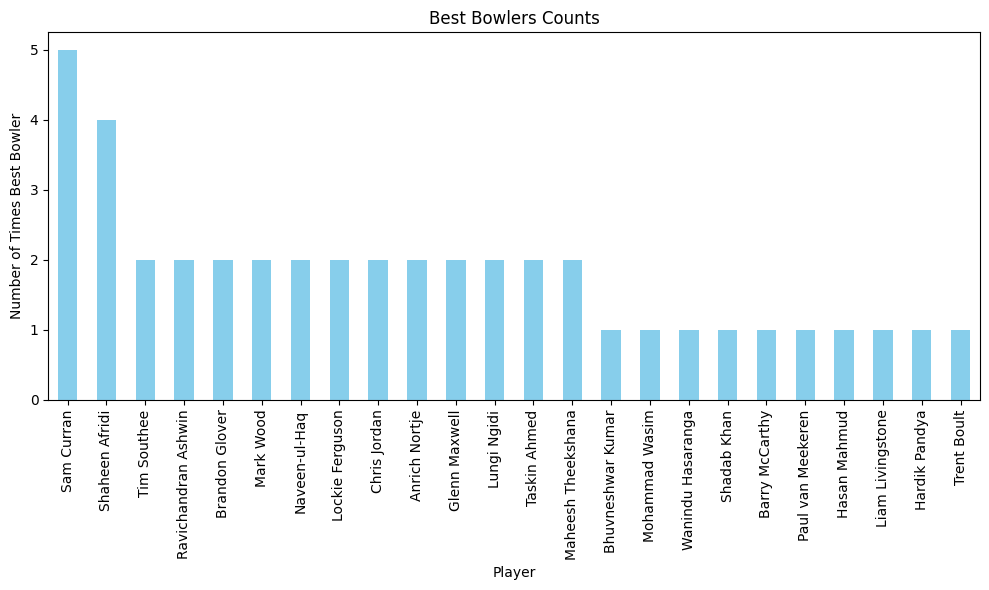

In [37]:
best_bowler_counts = data['best bowler'].value_counts()

# Display the top 10 best bowlers (optional)
print("Top Best Bowlers:")
print(best_bowler_counts.head(10))

# Create a bar graph
plt.figure(figsize=(10, 6))
best_bowler_counts.plot(kind='bar', color='skyblue')
plt.title('Best Bowlers Counts')
plt.xlabel('Player')
plt.ylabel('Number of Times Best Bowler')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

Thus Sam Curran was the best and most consistent bowler of the season.

Home team Vs away team:

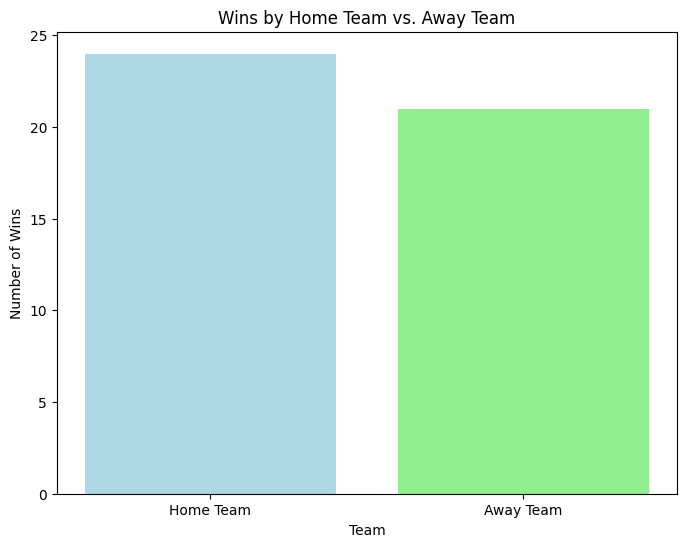

In [43]:
home_team_wins = data[data['winner'] == data['home_team']].shape[0]
away_team_wins = data[data['winner'] == data['away_team']].shape[0]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Home Team', 'Away Team'], [home_team_wins, away_team_wins], color=['lightblue', 'lightgreen'])
plt.title('Wins by Home Team vs. Away Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

This was to check if Home teams reaaly do have an advantage in a match , and the result supports the statement.

Now Some meaningful insights from the data :
Home team always has an advantage 
England won the most number of matches
Virat Kohli scored highest in the most number of matches
Sam Curran was the best bowler in the most number of matches
More teams won by batting first
More teams decided to bat first
Bat vs Bowl wins tend to be almost equal